In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

# Initial imports
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

%matplotlib inline

In [2]:
csv_path = Path('../Project-03/new_teamstats_df.csv')
teamstats_df = pd.read_csv(csv_path)

In [4]:
teamstats_df = teamstats_df.drop(columns=['Unnamed: 0'])

In [5]:
# dropping columns for model tuning

teamstats_df = teamstats_df.drop(columns=['A_H/A',
                                          'H_+/-',
                                          'A_+/-',
                                          'H_PTS',
                                          'A_PTS',
                                          'A_W/L',
                                         'H_FGM',
                                         'A_FGM',
                                         'H_REB',
                                         'A_REB',
                                         'H_FTM',
                                         'A_FTM',
                                         'H_FTA',
                                         'A_FTA'])

In [7]:
teamstats_df.shape

(12738, 188)

In [472]:
teamstats_df.head()

,H_H/A,H_W/L,H_MIN,H_FGA,H_FG%,H_3PM,H_3PA,H_3P%,H_FT%,H_OREB,...,A_TEAM2_OKC,A_TEAM2_ORL,A_TEAM2_PHI,A_TEAM2_PHX,A_TEAM2_POR,A_TEAM2_SAC,A_TEAM2_SAS,A_TEAM2_TOR,A_TEAM2_UTA,A_TEAM2_WAS
0,1,1,53,92,45.7,14,28,50.0,59.3,11,...,0,0,0,0,0,0,0,0,0,0
1,1,0,48,80,46.3,10,31,32.3,84.2,7,...,0,0,0,0,0,0,0,0,0,0
2,1,1,48,82,51.2,10,32,31.3,91.7,4,...,0,0,0,0,0,0,0,0,0,0
3,1,0,63,94,38.3,6,22,27.3,67.4,15,...,0,0,0,0,0,0,0,0,0,0
4,1,0,48,68,41.2,10,29,34.5,78.9,8,...,0,0,0,0,0,0,0,0,0,0


In [474]:
print(teamstats_df.iloc[:,0:30])

       H_H/A  H_W/L  H_MIN  H_FGA  H_FG%  H_3PM  H_3PA  H_3P%  H_FT%  H_OREB  \
0          1      1     53     92   45.7     14     28   50.0   59.3      11   
1          1      0     48     80   46.3     10     31   32.3   84.2       7   
2          1      1     48     82   51.2     10     32   31.3   91.7       4   
3          1      0     63     94   38.3      6     22   27.3   67.4      15   
4          1      0     48     68   41.2     10     29   34.5   78.9       8   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
12733      1      0     48    100   41.0     10     37   27.0   80.0      15   
12734      1      1     48     88   45.5      9     23   39.1   71.4      11   
12735      1      1     53     96   46.9      4     27   14.8   71.9       3   
12736      1      1     48     94   53.2      9     16   56.3   63.2      10   
12737      1      0     48     86   40.7      5     25   20.0   80.0       9   

       ...  A_3PA  A_3P%  A_FT%  A_OREB

In [389]:
# Creating the X and y sets
X = teamstats_df.iloc[:,0:30].values
y = teamstats_df["H_W/L"].values

In [390]:
X.shape

(12738, 30)

In [604]:
# Creating training, validation, and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=78)

In [621]:
# Model set-up
number_input_features = 30
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 5
#hidden_nodes_layer4 = 5
#hidden_nodes_layer5 = 5

In [622]:
# Define the LSTM RNN model
model = Sequential()

# Layer 1
model.add(
    Dense(units=hidden_nodes_layer1, 
          input_dim=number_input_features, 
          activation="relu")
)

# Layer 2
model.add(Dense(units=hidden_nodes_layer2, activation="relu"))


# Layer 3
model.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Layer 4
#model.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Layer 5
#model.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
model.add(Dense(1, activation="sigmoid"))

In [623]:
# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

In [624]:
# Summarize the model
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_137 (Dense)            (None, 20)                620       
_________________________________________________________________
dense_138 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_139 (Dense)            (None, 5)                 55        
_________________________________________________________________
dense_140 (Dense)            (None, 1)                 6         
Total params: 891
Trainable params: 891
Non-trainable params: 0
_________________________________________________________________


In [625]:
# Training the model
batch_size = 1000
epochs = 50
training_history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/50
8/8 [==============================] - 5s 191ms/step - loss: 39.7011 - accuracy: 0.4099 - tp: 0.0000e+00 - tn: 1929.3333 - fp: 0.0000e+00 - fn: 2773.7778 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5000 - val_loss: 28.6320 - val_accuracy: 0.4324 - val_tp: 0.0000e+00 - val_tn: 1033.0000 - val_fp: 0.0000e+00 - val_fn: 1356.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 2/50
8/8 [==============================] - 0s 13ms/step - loss: 26.6320 - accuracy: 0.4048 - tp: 0.0000e+00 - tn: 1921.3333 - fp: 0.0000e+00 - fn: 2781.7778 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5000 - val_loss: 15.1226 - val_accuracy: 0.4324 - val_tp: 0.0000e+00 - val_tn: 1033.0000 - val_fp: 0.0000e+00 - val_fn: 1356.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 3/50
8/8 [==============================] - 0s 13ms/step - loss: 12.4710 - accuracy: 0.4124 - tp: 7.0000 - tn: 1930.4444 - fp: 4.8889 - fn: 2760.7778 - pre

Epoch 22/50
8/8 [==============================] - 0s 14ms/step - loss: 0.6507 - accuracy: 0.7401 - tp: 2292.3333 - tn: 1196.3333 - fp: 716.1111 - fn: 498.3333 - precision: 0.7601 - recall: 0.8227 - auc: 0.8107 - val_loss: 0.5961 - val_accuracy: 0.7468 - val_tp: 1085.0000 - val_tn: 699.0000 - val_fp: 334.0000 - val_fn: 271.0000 - val_precision: 0.7646 - val_recall: 0.8001 - val_auc: 0.8244
Epoch 23/50
8/8 [==============================] - 0s 13ms/step - loss: 0.5856 - accuracy: 0.7563 - tp: 2281.4444 - tn: 1278.8889 - fp: 650.3333 - fn: 492.4444 - precision: 0.7784 - recall: 0.8207 - auc: 0.8301 - val_loss: 0.5225 - val_accuracy: 0.7668 - val_tp: 1135.0000 - val_tn: 697.0000 - val_fp: 336.0000 - val_fn: 221.0000 - val_precision: 0.7716 - val_recall: 0.8370 - val_auc: 0.8472
Epoch 24/50
8/8 [==============================] - 0s 13ms/step - loss: 0.5110 - accuracy: 0.7760 - tp: 2304.0000 - tn: 1345.1111 - fp: 580.0000 - fn: 474.0000 - precision: 0.7967 - recall: 0.8344 - auc: 0.8532 - v

Epoch 43/50
8/8 [==============================] - 0s 12ms/step - loss: 0.3085 - accuracy: 0.8695 - tp: 2496.6667 - tn: 1600.1111 - fp: 341.4444 - fn: 264.8889 - precision: 0.8782 - recall: 0.9032 - auc: 0.9434 - val_loss: 0.2884 - val_accuracy: 0.8811 - val_tp: 1257.0000 - val_tn: 848.0000 - val_fp: 185.0000 - val_fn: 99.0000 - val_precision: 0.8717 - val_recall: 0.9270 - val_auc: 0.9526
Epoch 44/50
8/8 [==============================] - 0s 12ms/step - loss: 0.2981 - accuracy: 0.8730 - tp: 2513.7778 - tn: 1592.6667 - fp: 341.2222 - fn: 255.4444 - precision: 0.8797 - recall: 0.9093 - auc: 0.9479 - val_loss: 0.2859 - val_accuracy: 0.8811 - val_tp: 1271.0000 - val_tn: 834.0000 - val_fp: 199.0000 - val_fn: 85.0000 - val_precision: 0.8646 - val_recall: 0.9373 - val_auc: 0.9545
Epoch 45/50
8/8 [==============================] - 0s 12ms/step - loss: 0.2912 - accuracy: 0.8761 - tp: 2556.8889 - tn: 1560.7778 - fp: 363.5556 - fn: 221.8889 - precision: 0.8750 - recall: 0.9220 - auc: 0.9508 - val

<AxesSubplot:title={'center':'Loss'}, xlabel='Epoch'>

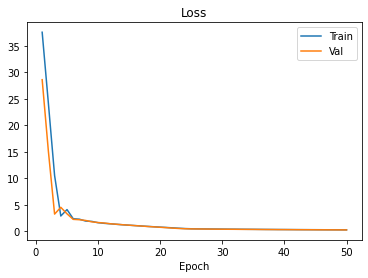

In [626]:
# Plotting loss
loss_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["loss"],
        "Val": training_history.history["val_loss"],
    }
)
loss_df.set_index("Epoch", inplace=True)
loss_df.plot(title="Loss")

<AxesSubplot:title={'center':'Accuracy'}, xlabel='Epoch'>

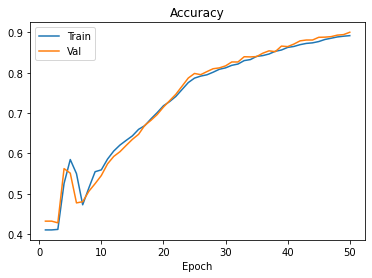

In [627]:
# Plotting accuracy
accuracy_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["accuracy"],
        "Val": training_history.history["val_accuracy"],
    }
)
accuracy_df.set_index("Epoch", inplace=True)
accuracy_df.plot(title="Accuracy")

<AxesSubplot:title={'center':'AUC'}, xlabel='Epoch'>

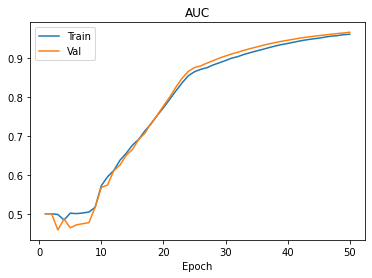

In [628]:
# Plotting AUC
auc_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["auc"],
        "Val": training_history.history["val_auc"],
    }
)
auc_df.set_index("Epoch", inplace=True)
auc_df.plot(title="AUC")

In [629]:
# Import the roc_curve and auc metrics from sklearn
from sklearn.metrics import roc_curve, auc

In [630]:
# Making predictions to feed the roc_curve module
train_predictions = model.predict(X_train, batch_size=1000)
test_predictions = model.predict(X_test, batch_size=1000)

In [631]:
# Calculate the ROC curve and AUC for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_predictions)
auc_train = auc(fpr_train, tpr_train)
auc_train = round(auc_train, 4)

# Calculate the ROC curve and AUC for the testing set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_predictions)
auc_test = auc(fpr_test, tpr_test)
auc_test = round(auc_test, 4)

In [632]:
# Create a DataFrame with the fpr and tpr results
roc_df_train = pd.DataFrame({"FPR Train": fpr_train, "TPR Train": tpr_train,})

roc_df_test = pd.DataFrame({"FPR Test": fpr_test, "TPR Test": tpr_test,})

<AxesSubplot:title={'center':'Test ROC Curve (AUC=0.9661)'}, xlabel='FPR Test'>

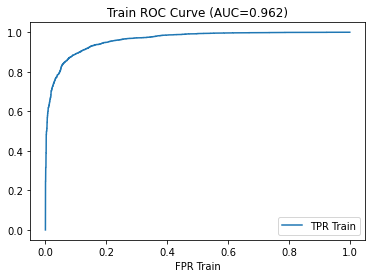

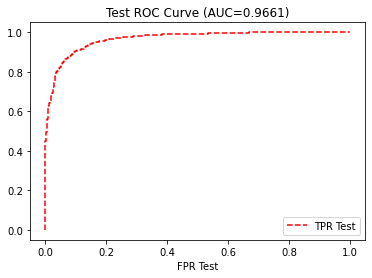

In [633]:
# Plotting the ROC Curves
roc_df_train.plot(
    x="FPR Train",
    y="TPR Train",
    xlim=([-0.05, 1.05]),
    title=f"Train ROC Curve (AUC={auc_train})",
)

roc_df_test.plot(
    x="FPR Test",
    y="TPR Test",
    color="red",
    style="--",
    xlim=([-0.05, 1.05]),
    title=f"Test ROC Curve (AUC={auc_test})",
)

In [634]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

# Define metrics dictionary
metrics = {k: v for k, v in zip(model.metrics_names, scores)}

# Display evaluation metrics results
display(metrics)

{'loss': 0.2486059069633484,
 'accuracy': 0.901412844657898,
 'tp': 1704.0,
 'tn': 1167.0,
 'fp': 179.0,
 'fn': 135.0,
 'precision': 0.9049389362335205,
 'recall': 0.9265905618667603,
 'auc': 0.9661036729812622}

In [635]:
# Define the confusion matrix data
cm_df = pd.DataFrame(
    {
        "Positive (1)": [f"TP={metrics['tp']}", f"FP={metrics['fn']}"],
        "Negative (0)": [f"FN={metrics['fp']}", f"TN={metrics['tn']}"],
    },
    index=["Positive(1)", "Negative(0)"],
)
cm_df.index.name = "Actual"
cm_df.columns.name = "Predicted"

# Show the confusion matrix
cm_df

Predicted,Positive (1),Negative (0)
Actual,,
Positive(1),TP=1704.0,FN=179.0
Negative(0),FP=135.0,TN=1167.0


In [636]:
# Import the classification_report method from sklearn
from sklearn.metrics import classification_report

# Predict classes using testing data
y_predict_classes = model.predict_classes(X_test, batch_size=1000)

# Display classification report
print(classification_report(y_predict_classes, y_test))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1302
           1       0.93      0.90      0.92      1883

    accuracy                           0.90      3185
   macro avg       0.90      0.90      0.90      3185
weighted avg       0.90      0.90      0.90      3185

